In [4]:
# Importing the neccessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

from collections import Counter
from matplotlib import cm
import matplotlib as mpl

## Importing the datasets
### Baseball

In [5]:
# Importing the baseball datasets

baseball_dataset1 = pd.read_csv('datasets/baseball/BASEBALL_1M.csv')
baseball_dataset2 = pd.read_csv('datasets/baseball/BASEBALL_2M.csv')

# Setting custom row label

baseball_dataset1 = baseball_dataset1.set_index('Unnamed: 0', drop=True)
baseball_dataset2 = baseball_dataset2.set_index('Unnamed: 0', drop=True)

# Checking the datasets

baseball_dataset1.head()
#baseball_dataset2.head()

,Victor_Conte,Jeremy_Giambi,Jason_Giambi,Gary_Sheffield,Bobby_Estalella,Benito_Santiago,Marvin_Bernard,Barry_Bonds,Armando_Rios,Randy_Velarde,...,Kevin_Young,Tim_Laker,Hal_Morris,Mike_Lansing,Glenallen_Hill,Mike_Bell,Bart_Miadich,Jim_Parque,Phil_Hiatt,Denny_Neagle
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Victor_Conte,1,1,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Jeremy_Giambi,1,1,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Jason_Giambi,1,1,2,2,1,1,1,2,2,1,...,0,0,0,0,0,0,0,0,0,0
Gary_Sheffield,1,1,2,2,1,1,1,2,2,1,...,0,0,0,0,0,0,0,0,0,0
Bobby_Estalella,0,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Pandas -> Numpy array

baseball1 = baseball_dataset1.to_numpy()
baseball2 = baseball_dataset2.to_numpy()

### Airport

In [7]:
# Importing the baseball datasets

flights_dataset = pd.read_csv('datasets/uk_flights/Table_1_12_Domestic_Passengers_Uplifted_Between_UK_Airports_2003_adjlist.csv', sep = ';')

# Dropping the last column, which is invalid

flights_dataset = flights_dataset.drop(columns=['Unnamed: 3'])

# Checking the datasets

flights_dataset.head()

,#this_apt_name,that_apt_name,passengers
0,HEATHROW,ABERDEEN,483226
1,HEATHROW,BELFAST CITY,743758
2,HEATHROW,BELFAST INTERNATIONAL,25963
3,HEATHROW,EDINBURGH,1577063
4,HEATHROW,GLASGOW,1345532


In [8]:
# Pandas -> Numpy array

flights = flights_dataset.to_numpy()

## Visualizing the connections
### Baseball

In [9]:
# Creating a graph object from the matrix

baseball_graph = nx.convert_matrix.from_numpy_matrix(baseball1)

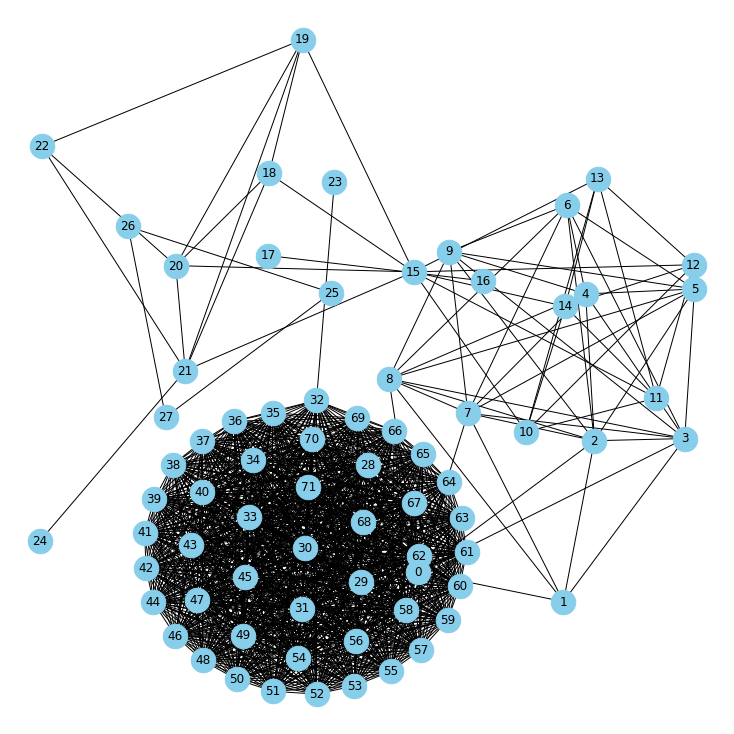

In [10]:
# Drawing the graph

plt.figure(figsize=(10,10))

#pos_cust = nx.circular_layout(baseball1_graph,scale=150)
pos_cust = nx.kamada_kawai_layout(baseball_graph)
#pos_cust = nx.spring_layout(baseball1_graph,scale=150)

nx.draw(baseball_graph, with_labels=True, 
        node_color = 'skyblue', node_size=600, 
        pos = pos_cust, 
        width = 1) 

#plt.savefig('baseball_graph.jpg', dpi = 600)

### Calculating some basic properties

In [11]:
#print(f"radius: {nx.radius(baseball_graph)}")
#print(f"diameter: {nx.diameter(baseball_graph)}")
#print(f"eccentricity: {nx.eccentricity(baseball_graph)}")
#print(f"center: {nx.center(baseball_graph)}")
#print(f"periphery: {nx.periphery(baseball_graph)}")
print(f"density: {nx.density(baseball_graph)}")

density: 0.426056338028169


### Flights

In [12]:
# Creating a list with the different airports

destinations1 = list(set(flights.T[0]))
destinations2 = list(set(flights.T[1]))

all_dest = list(set(destinations1 + destinations2))

In [13]:
# Creating the graph

flights_graph = nx.Graph()

# Adding the nodes

for i in range(0,len(all_dest)):
    flights_graph.add_node(all_dest[i])
    
# Adding the weights

for i in range(0,len(flights)):
    flights_graph.add_edge(flights[i][0], flights[i][1])

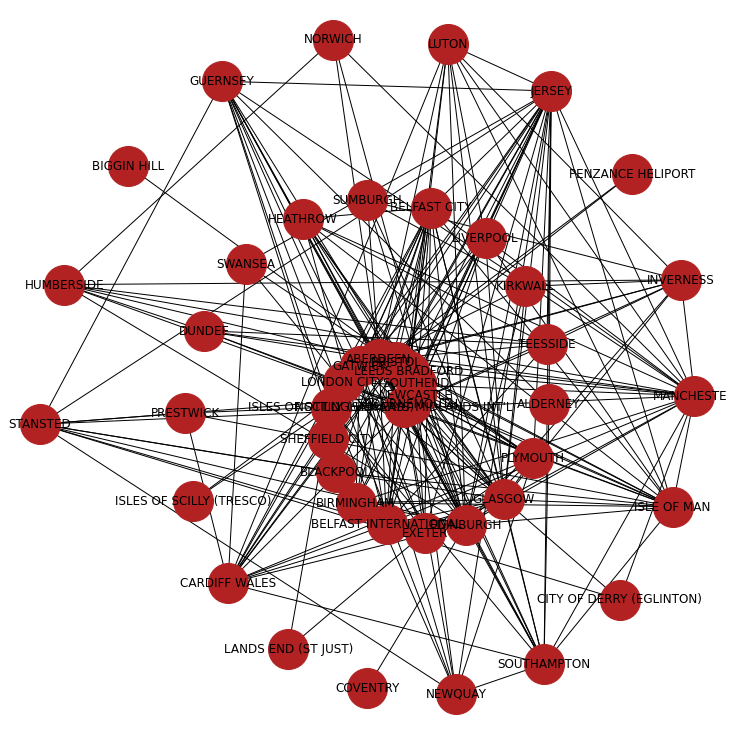

In [14]:
# Plotting the graph

plt.figure(figsize = (10,10))

# Setting the layout

pos_cust = nx.spiral_layout(flights_graph,scale=150)

nx.draw(flights_graph, with_labels=True, font_size=12,
        pos = pos_cust,
        node_color = 'firebrick', node_size=1600,  
        width = 1)

#plt.savefig('flights_graph.jpg', dpi=600)

In [208]:
# Closeness centrality

flights_closeness_list = list(nx.closeness_centrality(flights_graph).keys())
flights_closeness_values = list(nx.closeness_centrality(flights_graph).values())

flights_eigenvalue_list = list(nx.eigenvector_centrality(flights_graph).keys())
flights_eigenvalue_values = list(nx.eigenvector_centrality(flights_graph).values())

In [219]:
flights_closeness_eigen_matrix = []

for i in range(0,len(flights_closeness_list)):
    string = flights_closeness_list[i] + ' ' + str(flights_closeness_values[i]) +  ' ' + str(flights_eigenvalue_values[i]) 
    flights_closeness_eigen_matrix.append(string)

In [225]:
f = open("flights_closeness_eigen.txt", "a")
for i in range(0,len(flights_closeness_list)):
    string = flights_closeness_list[i] + ',' + str(flights_closeness_values[i]) +  ',' + str(flights_eigenvalue_values[i]) + '\n' 
    f.write(string)
f.close()

## US Flights

In [16]:
# Importing the facebook posts datasets

us_flights_dataset = pd.read_csv('datasets/us_flights/us_flights.txt', sep = ' ', names=["Departure", "Destination", "Time"])

# Checking the dataset

us_flights_dataset.head()

,Departure,Destination,Time
0,1,111,68150
1,1,49,110902
2,1,283,72020
3,1,177,220192
4,1,72,164951


In [17]:
# Transforming the data into a numpy array

us_flights = us_flights_dataset.to_numpy()

us_flights_departure = us_flights.T[0]
us_flights_destination = us_flights.T[1]

# Creating a vector containing every city in the lists

us_all_dest = list(set(list(us_flights_departure) + list(us_flights_destination)))

In [18]:
# Creating the graph for the US flights

us_flights_graph = nx.Graph()
    
# Adding the edges

for i in range(0,len(us_flights_departure)):
    us_flights_graph.add_edge(us_flights_departure[i], us_flights_destination[i]) 

In [19]:
# Calculating the degree centrality 

us_flights_degree_cent = nx.degree_centrality(us_flights_graph)

# Calculating the degree distribution (not normalised)

us_flights_degree_distr = np.round(np.array(list(us_flights_degree_cent.values()))*(len(us_all_dest)-1))

# Counting the different values

us_flights_degree_distr_dict = Counter(us_flights_degree_distr)

In [20]:
# Going through the us_flights_degree_distr values
# Distinguishing the values above and below 5

# Creating a dictionary

my_dict = {}

# Creating a variable for the values below 5

temp_value = 0

# Creating a counter for the amount of cities being below degree_cent < 5

city_counter = 0

for i in range(0,len(list(us_flights_degree_distr_dict.values()))):

    #if the value is above 5, we add it to the dictionary
    if list(us_flights_degree_distr_dict.values())[i] > 5:
    
        my_dict[str(int(list(us_flights_degree_distr_dict.keys())[i]))] = list(us_flights_degree_distr_dict.values())[i]
    
    #if the values is under 5, we collect the values 
    else:
        temp_value += list(us_flights_degree_distr_dict.values())[i]
        city_counter += 1
        
# Appending the other values to the dictionary

my_dict['Other airports (' + str(city_counter) + ')'] = temp_value

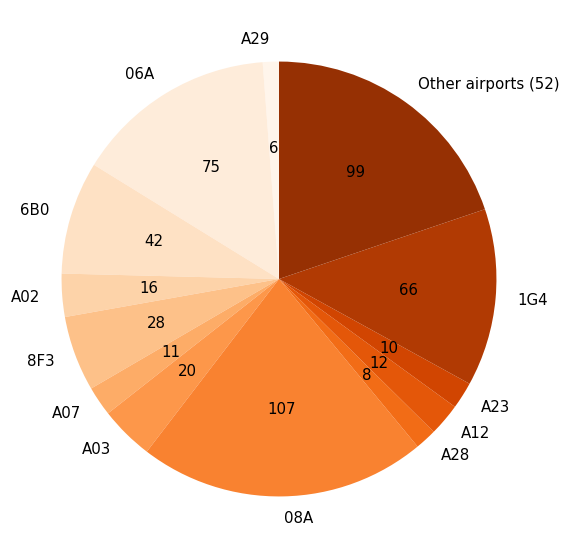

In [21]:
# Setting the font size to larger

mpl.rcParams['font.size'] = 15.0

# Setting the values for the pie chart

y = my_dict.values()
mylabels = ["A29", "06A", "6B0", "A02", "8F3", "A07", "A03", "08A", "A28", "A12", "A23", "1G4", 'Other airports (52)']

# Creating pie chart from the values

fig1, ax1 = plt.subplots(figsize=(10, 10))

theme = plt.get_cmap('Oranges')
ax1.set_prop_cycle("color", [theme(1. * i / len(list(my_dict.keys())))for i in range(len(list(my_dict.keys())))])

def absolute_value(val):
    a  = np.round(val/100.*sum(list(my_dict.values())), 0)
    return int(a)

ax1.pie(y, labels = mylabels, startangle = 90, autopct=absolute_value)

plt.savefig('us_flights_pie_chart.jpg', dpi=600)

plt.show()

In [34]:
# Creating a function for calculating the degree distribution

def plot_degree_histogram(g, normalized=False):

    aux_y = nx.degree_histogram(g)
    aux_x = np.arange(0,len(aux_y)).tolist()
    n_nodes = g.number_of_nodes()
    
    if normalized:
        for i in range(len(aux_y)):
            aux_y[i] = aux_y[i]/n_nodes
    
    return aux_x, aux_y

In [35]:
# Applying the function for the airports

aux_x = plot_degree_histogram(us_flights_graph)[0]
aux_y = plot_degree_histogram(us_flights_graph)[1]

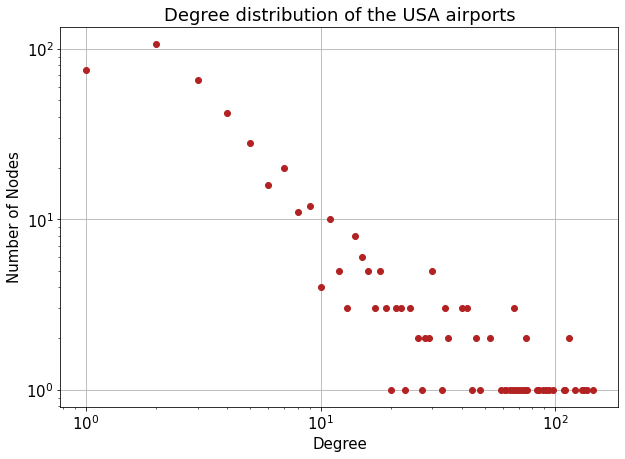

In [36]:
# Plotting the result histogram

plt.figure(figsize = (10,7))

plt.plot(aux_x, aux_y, 'o', color = 'firebrick')

plt.title('Degree distribution of the USA airports')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.xscale("log")
plt.yscale("log")

plt.grid()

#plt.savefig('degree_dist_usa_airports.jpg', dpi = 500)

plt.show()

## Hollywood movies

In [45]:
# Importing the Hollywood movies names

movies_names_dataset = pd.read_csv('datasets/hollywood_movies/names.txt', names = ['edge_num', 'name', 'data1', 'data2', 'data3'], sep = ' ')

# Checking the dataset

movies_names_dataset.head()

,edge_num,name,data1,data2,data3
NaN,1,"Rosenberg, A.",0.1000,0.5000,0.5
NaN,2,Chartoff-Winkler,0.1008,0.4754,0.5
NaN,3,"Wise, R.",0.1030,0.4508,0.5
NaN,4,"Schwartz, M.",0.1068,0.4265,0.5
NaN,5,"Arthur, R.",0.1121,0.4024,0.5


In [46]:
# Importing the Hollywood movies dataset

movies_dataset = pd.read_csv('datasets/hollywood_movies/edges.txt', names = ['node1', 'node2', 'weight'], sep = ' ')

# Checking the dataset

movies_dataset.head()

,node1,node2,weight
0,1,63,3
1,1,74,1
2,1,87,1
3,2,63,2
4,2,80,1


In [55]:
movies_node1 = list(movies_dataset['node1'])
movies_node2 = list(movies_dataset['node1'])
movies_names = list(movies_names_dataset['name'])
movies_nodes = list(movies_names_dataset['edge_num'])

In [56]:
# Creating the graph

movies_graph = nx.Graph()

# Adding the nodes

for i in range(0,len(movies_nodes)):
    movies_graph.add_node(movies_nodes[i])
    
# Adding the weights

for i in range(0,len(movies_node1)):
    movies_graph.add_edge(movies_node1[i], movies_node2[i])

In [62]:
# Calculating the eigenvalue centrality

movies_eigen_cent = nx.eigenvector_centrality(movies_graph)

## Protein-protein interaction

In [64]:
# Importing the protein-protein interaction dataset

proteins_dataset = pd.read_csv('datasets/proteins/protein_interaction.txt', names = ['node1', 'node2', 'weight'], sep = '\t')

# Checking the dataset

proteins_dataset.head()

,node1,node2,weight
0,YLR291C,YNL229C,CCSB-Y2H
1,YLR291C,YCR086W,CCSB-Y2H
2,YLR291C,YPR062W,CCSB-Y2H
3,YJL085W,YBR057C,CCSB-Y2H
4,YLR227C,YDR208W,CCSB-Y2H


In [89]:
# Extracting the values

protein_node1 = list(proteins_dataset['node1'])
protein_node2 = list(proteins_dataset['node2'])

# Checking the len of list of all proteins

diff_proteins = list(Counter(protein_node1 + protein_node2).keys())
protein_list_len = len(diff_proteins)

# Replacing them with numeric values

protein_num_temp = list(range(0,protein_list_len))

# Iterating through the data

for j in range(0,len(diff_proteins)):
    for i in range(0,len(protein_node1)):
        if protein_node1[i] == diff_proteins[j]:
            protein_node1[i] = protein_num_temp[j]
            
for j in range(0,len(diff_proteins)):
    for i in range(0,len(protein_node2)):
        if protein_node2[i] == diff_proteins[j]:
            protein_node2[i] = protein_num_temp[j]

In [93]:
# Creating the graph

proteins_graph = nx.Graph()

# Adding the nodes

for i in range(0,len(movies_nodes)):
    proteins_graph.add_node(protein_num_temp[i])
    
# Adding the weights

for i in range(0,len(movies_node1)):
    proteins_graph.add_edge(protein_node1[i], protein_node2[i])

In [107]:
# Calculating the eigenvalue centrality

proteins_eigen_cent = nx.eigenvector_centrality(proteins_graph)

prot_keys = list(proteins_eigen_cent.keys())
prot_values = list(proteins_eigen_cent.values())

# Sorting the eigenvector centrality values

prot_values.sort()

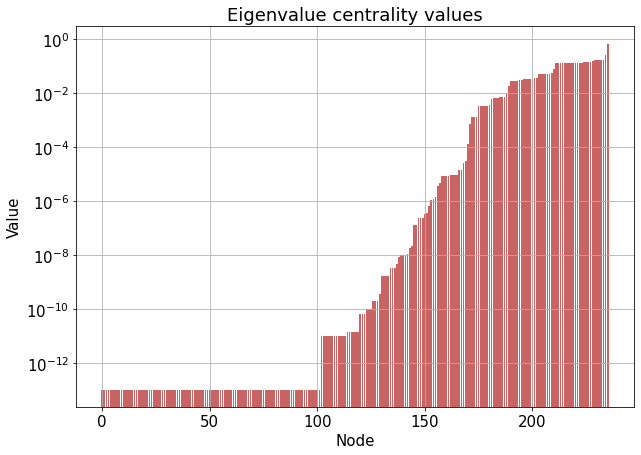

In [123]:
# Setting the values

height = list(range(0,len(prot_values)))


# Plotting the barchart

plt.figure(figsize=(10,7))
plt.bar(height, prot_values, align='center', alpha=0.7, color = 'firebrick')

plt.ylabel('Value')
plt.title('Eigenvalue centrality values')
plt.yscale('log')
plt.xlabel('Node')

plt.grid()

plt.savefig('protein_eigenv_cent.jpg', dpi = 500)

plt.show()

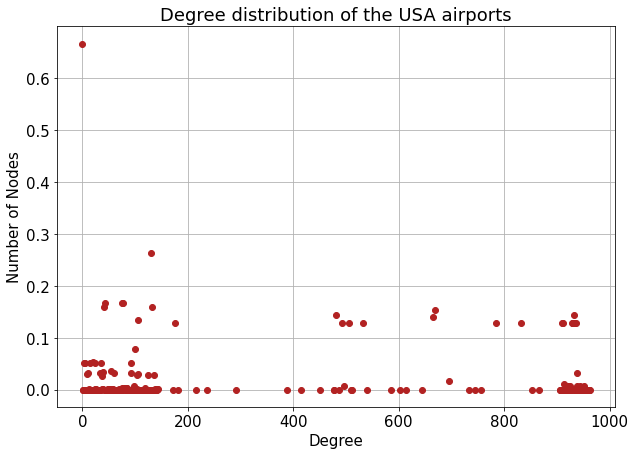

In [105]:
# Plotting the result histogram

plt.figure(figsize = (10,7))

plt.plot(prot_keys, prot_values, 'o', color = 'firebrick')

plt.title('Degree distribution of the USA airports')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
#plt.xscale("log")
#plt.yscale("log")

plt.grid()

plt.savefig('degree_dist_usa_airports.jpg', dpi = 500)

plt.show()

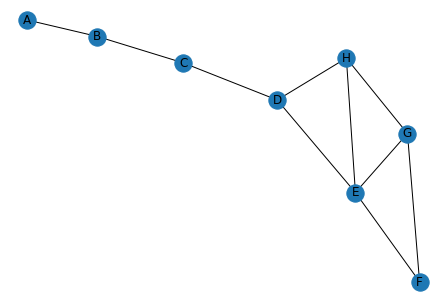

In [131]:
G = nx.Graph()
G.add_node('A')
G.add_node('B')
G.add_node('C')
G.add_node('D')
G.add_node('E')
G.add_node('F')
G.add_node('G')
G.add_node('H')
G.add_node('E')

G.add_edge('A', 'B')
G.add_edge('B', 'C')
G.add_edge('C', 'D')
G.add_edge('D', 'E')
G.add_edge('D', 'H')
G.add_edge('E', 'H')
G.add_edge('E', 'G')
G.add_edge('E', 'F')
G.add_edge('F', 'G')
G.add_edge('G', 'H')

nx.draw(G, with_labels=True)



In [133]:
nx.closeness_centrality(G)

{'A': 0.2916666666666667,
 'B': 0.3888888888888889,
 'C': 0.5,
 'D': 0.5833333333333334,
 'E': 0.5384615384615384,
 'F': 0.3888888888888889,
 'G': 0.4117647058823529,
 'H': 0.5}

In [136]:
1/1.71

0.5847953216374269

## Facebook wall posts

In [145]:
# Importing the protein-protein interaction dataset

facebook_dataset = pd.read_csv('datasets/facebook-wosn-wall/out.facebook-wosn-wall', sep= ' ')

# Checking the dataset

facebook_dataset.head()

,node1,node2,weight,data
0,1,1,1,1095135831
1,2,3,1,1097725406
2,4,4,1,1098387569
3,5,5,1,1098425204
4,2,3,1,1098489762


In [187]:
# Extracting the data

facebook_node1 = list(facebook_dataset['node1'])
facebook_node2 = list(facebook_dataset['node2'])

# Creating a joint list

facebook_nodes = facebook_node1 + facebook_node2

In [188]:
# Creating the graph

facebook_graph = nx.Graph()

# Adding the nodes

for i in range(0,len(facebook_nodes)):
    facebook_graph.add_node(facebook_nodes[i])
    
# Adding the weights

for i in range(0,len(movies_node1)):
    facebook_graph.add_edge(facebook_node1[i], facebook_node2[i])

In [189]:
# Calculating the Closeness centrality

facebook_closeness_cent = nx.closeness_centrality(facebook_graph)

facebook_closeness_cent_keys = list(facebook_closeness_cent.keys())
facebook_closeness_cent_values = list(facebook_closeness_cent.values())

# Calculating the degree distribtuion

facebook_degree = list(nx.degree(facebook_graph))

# Extracting the degrees

facebook_degree_keys = []
facebook_degree_values = []

for i in range(0,len(facebook_degree)):
    facebook_degree_keys.append(facebook_degree[i][0])
    facebook_degree_values.append(facebook_degree[i][1])

In [197]:
j = 0

for i in range(0,len(facebook_degree_values)):
    if facebook_degree_values[i] == 0:
        j += 1

In [198]:
j

46787

In [200]:
len(facebook_degree_values)-j

165